In [19]:
from IPython.display import display, HTML

def load_css(path='../style.css'):
    with open(path) as f:
        styles = f.read()
    display(HTML(f"<style>{styles}</style>"))

load_css()


# ROC 曲线

在分类任务中，我们通常用一个**分类模型**来判断样本属于正类（1）还是负类（0）。

模型通常会输出一个 **概率值**（比如某个样本是正类的概率是 0.85），我们会设一个**阈值**（threshold），比如 0.5 来判断最终结果是否为正类。

但：**不同的阈值会影响模型的分类结果**。

所以，我们想知道：如果我把阈值从 0 调到 1，模型整体的表现如何变化？这正是 **ROC 曲线** 所展示的。


<link href="../style.css" rel="stylesheet">

**1️⃣ 混淆矩阵（Confusion Matrix）**

|            | 实际为正类 | 实际为负类 |
| ---------- | ---------- | ---------- |
| 预测为正类 | TP         | FP         |
| 预测为负类 | FN         | TN         |

- **TP（True Positive）**：预测为正类，实际也是正类
- **FP（False Positive）**：预测为正类，实际是负类
- **FN（False Negative）**：预测为负类，实际是正类
- **TN（True Negative）**：预测为负类，实际是负类


**2️⃣ 主要指标**

| 指标名            | 公式           | 含义                     |
| ----------------- | -------------- | ------------------------ |
| **TPR**（真正率） | TP / (TP + FN) | 正类中预测正确的比例     |
| **FPR**（假正率） | FP / (FP + TN) | 负类中被误判为正类的比例 |

ROC 曲线就是画出：

```
FPR 为 x 轴
TPR 为 y 轴
```

每个点对应一个不同的阈值。


- **AUC（Area Under the Curve）** 是 ROC 曲线下的面积


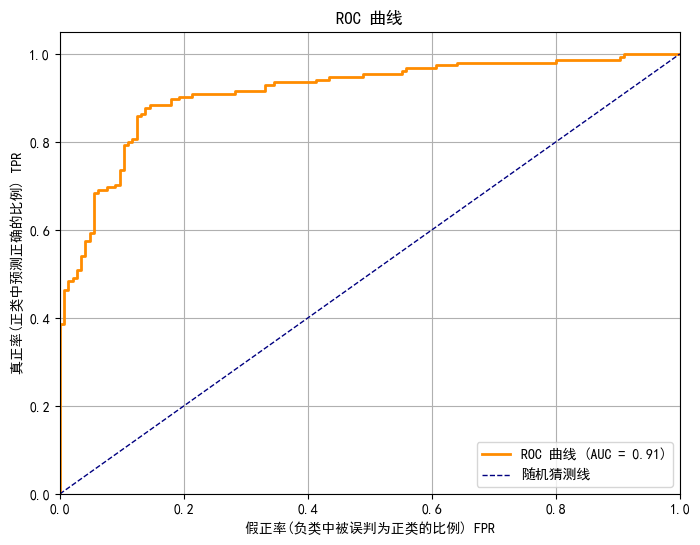

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

plt.rcParams["font.family"] = "SimHei"  # 设置中文字体（黑体）
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

# 1. 生成模拟的二分类数据
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. 训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. 预测概率（用于绘制 ROC）
y_probs = model.predict_proba(X_test)[:, 1]  # 取正类的概率

# 5. 计算 ROC 曲线和 AUC 值
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 6. 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC 曲线 (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--", label="随机猜测线")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("假正率(负类中被误判为正类的比例) FPR")
plt.ylabel("真正率(正类中预测正确的比例) TPR")
plt.title("ROC 曲线")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()